In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

#AUCplot = plt.figure()


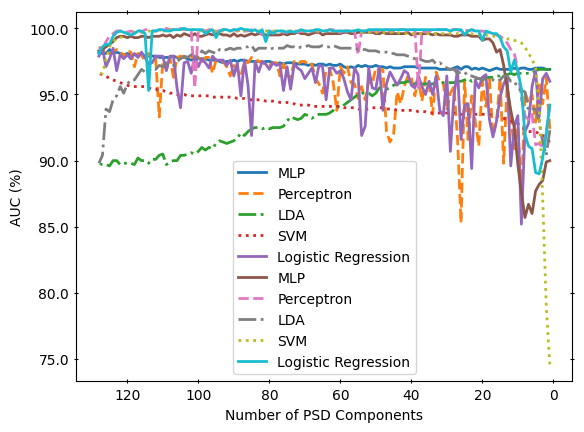

In [2]:
modelOptions = ["MLP",
                "Perceptron",
                "LDA", 
                "SVM",
                "Logistic Regression"
                ]

lineStyles = ["-",
                "--",
                "-.", 
                ":",
                "-"
                ]

x = list(range(1, 129))

dataAblationOrder = {#Specify order in which to successively remove PSD components based on frequency.
        "High to low frequency":["highFreqtoLowFreq", 0],
        "Low to high frequency":["lowFreqtoHighFreq", 1]
    }
plt.gca().invert_xaxis()
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().tick_params(axis="both", direction="in", tickdir = "inout")
plt.ylabel("AUC (%)")
plt.xlabel("Number of PSD Components")
for order in dataAblationOrder:
    for selectedModel, lineStyle in zip(modelOptions, lineStyles):
        #Read log file for AUCs and number of PSD components.
        file = open("../results_{}/{}_AUC.csv".format(dataAblationOrder[order][0],selectedModel), "r")
        data = file.readlines()
        y = []
        for line in data[2:]:
            y.append(float(line.split(",")[1].split("\n")[0])*100)
        plt.plot(x, y, label = selectedModel, linestyle = lineStyle, linewidth = 2)
    plt.legend()
    plt.savefig("../results_{}/AUC_{}".format(dataAblationOrder[order][0], dataAblationOrder[order][0]))